In [143]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from sklearn import metrics
%matplotlib inline
pd.options.display.max_columns = None

In [198]:

AnomalyDetectedDataPath = '../result/AnomalyDetectionResult/'
EventDataPath = '../events/'


In [199]:
f = open(AnomalyDetectedDataPath+'AbsoluteAnomaly.csv', 'w+')
# f.write('city,Method,GMM Parameter,National Holiday TP,National Holiday FP,National Holiday TN,National Holiday FN,Culture Event TP,Culture Event FP,Culture Event TN,Culture Event FN,Extreme Weather TP,Extreme Weather FP,Extreme Weather TN,Extreme Weather FN,Overall TP,Overall FP,Overall TN,Overall FN\n')
f.write('city,Method,GMM Parameter,National Holiday TP,Culture Event TP,Extreme Weather TP,Overall TP,Overall FP,Overall TN,Overall FN,Precision,Recall,NationalHoliday,CultureEvent,ExtremeWeather\n')
f.close()

In [200]:
for aggregation in ['Comm']:
    for dimension in ['PCA', 'AE']:
        for city in ['Taipei','NewYork']:
            for standardize in ['Standardize']:#, 'Whiten', 'Both']:
                print(city, aggregation, dimension, standardize)
                df = pd.read_csv(AnomalyDetectedDataPath+city+aggregation+dimension+standardize+'.csv')
                df = df.replace(['3.0','2.0','1.0','0.0'],[True,True,True,False])
                df[list(df.columns)] = df[list(df.columns)].astype('str')
            method = aggregation+dimension+standardize
            for iteration in list(df.columns):
                if iteration not in ['Date','National Holiday','Extreme Weather','Culture Event','Anomaly']:
                    NHTP = len(df[(df['National Holiday']=='True')&(df[iteration]=='True')])
                    NH = len(df[(df['National Holiday']=='True')])
                    CETP = len(df[(df['Culture Event']=='True')&(df[iteration]=='True')])
                    CE = len(df[(df['Culture Event']=='True')])
                    EWTP = len(df[(df['Extreme Weather']=='True')&(df[iteration]=='True')])
                    EW = len(df[(df['Extreme Weather']=='True')])
                    allTP = len(df[(df['Anomaly']=='True')&(df[iteration]=='True')])
                    allFP = len(df[(df['Anomaly']=='False')&(df[iteration]=='True')])
                    allTN = len(df[(df['Anomaly']=='False')&(df[iteration]=='False')])
                    allFN = len(df[(df['Anomaly']=='True')&(df[iteration]=='False')])
                    if allTP+allFP > 0:
                        precision = allTP / (allTP+allFP)
                    else:
                        precision = 0
                    if allTP+allFN > 0:
                        recall = allTP / (allTP+allFN)
                    else:
                        recall = 0
                    f = open(AnomalyDetectedDataPath+'AbsoluteAnomaly.csv', 'a+')
#                     f.write(city+','+method+','+str(iteration)+','+str(NHTP)+','+str(NHFP)+','+str(NHTN)+','+str(NHFN)+','+str(CETP)+','+str(CEFP)+','+str(CETN)+','+str(CEFN)+','+str(EWTP)+','+str(EWFP)+','+str(EWTN)+','+str(EWFN)+','+str(allTP)+','+str(allFP)+','+str(allTN)+','+str(allFN)+'\n')
                    f.write(city+','+method+','+str(iteration)+','+str(NHTP)+','+str(CETP)+','+str(EWTP)+','+str(allTP)+','+str(allFP)+','+str(allTN)+','+str(allFN)+','+str(precision)+','+str(recall)+','+str(NH)+','+str(CE)+','+str(EW)+'\n')

                    f.close()

Taipei Comm PCA Standardize
NewYork Comm PCA Standardize
Taipei Comm AE Standardize
NewYork Comm AE Standardize


In [201]:
for city in ['Taipei','NewYork']:
    print(city)
    df = pd.read_csv(AnomalyDetectedDataPath+city+'Timeseries.csv')
    df = df.replace(['3.0','2.0','1.0','0.0'],[True,True,True,False])
    df[list(df.columns)] = df[list(df.columns)].astype('str')
    method = 'Timeseries'
    for iteration in list(df.columns):
        if iteration not in ['Date','National Holiday','Extreme Weather','Culture Event','Anomaly']:
           
            NHTP = len(df[(df['National Holiday']=='True')&(df[iteration]=='True')])
            NH = len(df[(df['National Holiday']=='True')])
            CETP = len(df[(df['Culture Event']=='True')&(df[iteration]=='True')])
            CE = len(df[(df['Culture Event']=='True')])
            EWTP = len(df[(df['Extreme Weather']=='True')&(df[iteration]=='True')])
            EW = len(df[(df['Extreme Weather']=='True')])
            allTP = len(df[(df['Anomaly']=='True')&(df[iteration]=='True')])
            allFP = len(df[(df['Anomaly']=='False')&(df[iteration]=='True')])
            allTN = len(df[(df['Anomaly']=='False')&(df[iteration]=='False')])
            allFN = len(df[(df['Anomaly']=='True')&(df[iteration]=='False')])
            if allTP+allFP > 0:
                precision = allTP / (allTP+allFP)
            else:
                precision = 0
            if allTP+allFN > 0:
                recall = allTP / (allTP+allFN)
            else:
                recall = 0
#             print(CE)
            f = open(AnomalyDetectedDataPath+'AbsoluteAnomaly.csv', 'a+')
#                     f.write(city+','+method+','+str(iteration)+','+str(NHTP)+','+str(NHFP)+','+str(NHTN)+','+str(NHFN)+','+str(CETP)+','+str(CEFP)+','+str(CETN)+','+str(CEFN)+','+str(EWTP)+','+str(EWFP)+','+str(EWTN)+','+str(EWFN)+','+str(allTP)+','+str(allFP)+','+str(allTN)+','+str(allFN)+'\n')
            f.write(city+','+method+','+str(iteration)+','+str(NHTP)+','+str(CETP)+','+str(EWTP)+','+str(allTP)+','+str(allFP)+','+str(allTN)+','+str(allFN)+','+str(precision)+','+str(recall)+','+str(NH)+','+str(CE)+','+str(EW)+'\n')

            f.close()

Taipei
NewYork


In [202]:
df = pd.read_csv(AnomalyDetectedDataPath+'AbsoluteAnomaly.csv')

In [203]:
df.fillna(0, inplace=True)

In [204]:
df.to_csv(AnomalyDetectedDataPath+'/AbsoluteAnomaly.csv',index=False)

In [205]:
df

,city,Method,GMM Parameter,National Holiday TP,Culture Event TP,Extreme Weather TP,Overall TP,Overall FP,Overall TN,Overall FN,Precision,Recall,NationalHoliday,CultureEvent,ExtremeWeather
0,Taipei,CommPCAStandardize,4-0.0,0,0,0,0,0,609,29,0.000000,0.000000,22,4,3
1,Taipei,CommPCAStandardize,4-0.01,1,0,2,3,3,606,26,0.500000,0.103448,22,4,3
2,Taipei,CommPCAStandardize,4-0.02,1,0,3,4,8,601,25,0.333333,0.137931,22,4,3
3,Taipei,CommPCAStandardize,4-0.03,3,0,3,6,13,596,23,0.315789,0.206897,22,4,3
4,Taipei,CommPCAStandardize,4-0.04,6,0,3,9,16,593,20,0.360000,0.310345,22,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,NewYork,Timeseries,3-0.95,16,3,3,22,528,29,0,0.040000,1.000000,16,3,3
598,NewYork,Timeseries,3-0.96,16,3,3,22,533,24,0,0.039640,1.000000,16,3,3
599,NewYork,Timeseries,3-0.97,16,3,3,22,539,18,0,0.039216,1.000000,16,3,3
600,NewYork,Timeseries,3-0.98,16,3,3,22,545,12,0,0.038801,1.000000,16,3,3


In [206]:
df['TPR'] = df['Overall TP'] / (df['Overall TP'] + df['Overall FN'])
df['FPR'] = df['Overall FP'] / (df['Overall FP'] + df['Overall TN'])
df['GMM'] = df['GMM Parameter'].apply(lambda x: x.split('-')[0])

<Figure size 368.504x170.079 with 0 Axes>

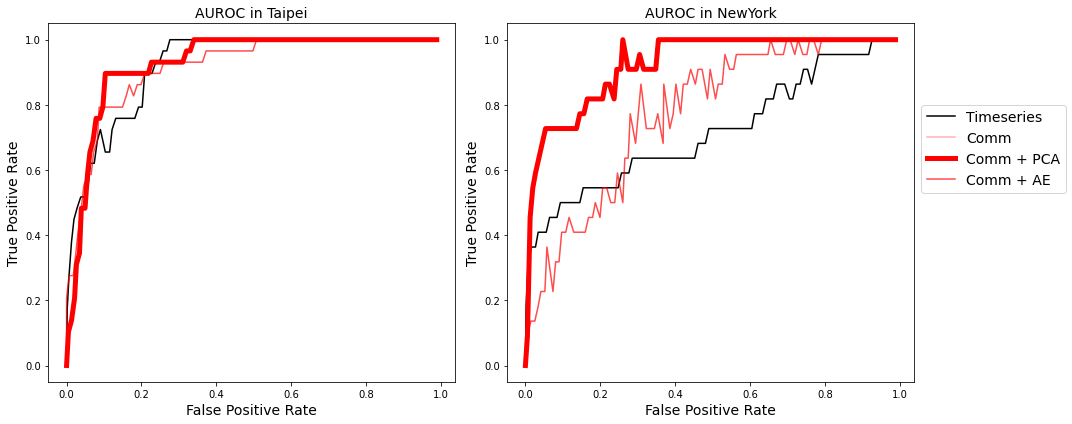

In [207]:
def cm2inch(value):
    return value/2.54

fig = plt.figure(figsize=(cm2inch(13), cm2inch(6)))

fig = plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(1,2,figure=fig)
ax = fig.add_subplot(gs[0,0])
plotdf = df[df['city']=='Taipei']
plotdfgmm = plotdf[(plotdf['Method']=='Timeseries')&(plotdf['GMM']=='4')]
ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='Timeseries',color='k')

# plotdfgmm = plotdf[(plotdf['Method']=='IOOriginSizeStandardize')&(plotdf['GMM']=='5')]
# ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='IO',color='blue',alpha=0.3)
# plotdfgmm = plotdf[(plotdf['Method']=='IOPCAStandardize')&(plotdf['GMM']=='5')]
# ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='IO + PCA',color='blue',alpha=1)
# plotdfgmm = plotdf[(plotdf['Method']=='IOAEStandardize')&(plotdf['GMM']=='5')]
# ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='IO + AE',color='blue',alpha=0.7)

plotdfgmm = plotdf[(plotdf['Method']=='CommOriginSizeStandardize')&(plotdf['GMM']=='4')]
ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='Comm',color='red',alpha=0.3)

plotdfgmm = plotdf[(plotdf['Method']=='CommPCAStandardize')&(plotdf['GMM']=='4')]
ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='Comm + PCA',color='red',alpha=1,linewidth=5)

plotdfgmm = plotdf[(plotdf['Method']=='CommAEStandardize')&(plotdf['GMM']=='4')]
ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='Comm + AE',color='red',alpha=0.7)


ax.set_title('AUROC in Taipei', fontsize=14)
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)


ax = fig.add_subplot(gs[0,1])
plotdf = df[df['city']=='NewYork']
plotdfgmm = plotdf[(plotdf['Method']=='Timeseries')&(plotdf['GMM']=='3')]
# plotdfgmm = plotdfgmm.sort_values(['TPR'])
ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='Timeseries',color='k')

# plotdfgmm = plotdf[(plotdf['Method']=='IO')&(plotdf['GMM']=='4')]
# ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='IOOriginSizeNormalize',color='blue',alpha=0.3)
# plotdfgmm = plotdf[(plotdf['Method']=='IOPCANormalize')&(plotdf['GMM']=='4')]
# ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='IO + PCA',color='blue',alpha=1)
# plotdfgmm = plotdf[(plotdf['Method']=='IOAENormalize')&(plotdf['GMM']=='4')]
# ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='IO + AE',color='blue',alpha=0.7)

plotdfgmm = plotdf[(plotdf['Method']=='CommOriginSizeStandardize')&(plotdf['GMM']=='3')]
ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='Comm',color='red',alpha=0.3)
plotdfgmm = plotdf[(plotdf['Method']=='CommPCAStandardize')&(plotdf['GMM']=='3')]
plotdfgmm = plotdfgmm.sort_values(['FPR'])
ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='Comm + PCA',color='red',alpha=1,linewidth=5)
plotdfgmm = plotdf[(plotdf['Method']=='CommAEStandardize')&(plotdf['GMM']=='3')]
ax.plot(plotdfgmm['FPR'],plotdfgmm['TPR'],label='Comm + AE',color='red',alpha=0.7)

ax.set_title('AUROC in NewYork', fontsize=14)
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.65),fontsize=14)
plt.tight_layout()
plt.savefig('ROC.png')